In [1]:
import cv2

import warnings

warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [5]:
def graph_session():
    graph = tf.Graph()
    session = tf.InteractiveSession(graph = graph)
    return graph, session


def image_tensor(filename):
    img = cv2.imread(filename,0)
    h,w = img.shape    
    
    img = img.reshape([1,h,w,1])
    img = tf.constant(img, dtype = tf.float32, name = 'x')
    print("image shape :", img.shape)
    
    return img


def filter_kernel_tensor():
    #filter
    x_filter2 = np.array([[-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]])

    x_filter2 =x_filter2.reshape([3,3,1,1]) #height ,width, inchannel, outchannel
    x_filter2 = tf.constant(x_filter2, dtype = tf.float32, name = 'filter')
    print("filter:", x_filter2)
    x_stride = [1,1,1,1]
    print("stride: ", x_stride)
    x_padding = 'VALID'
    
    print("padding: ", x_padding)
    
    return x_filter2, x_stride, x_padding


def show(out_image):
    out_image = np.array(out_image)
    _,batch,h,w,c = out_image.shape

    out_image = out_image.reshape([h,w])
    plt.imshow(out_image, cmap = 'gray')
    plt.show
    
    

## Convolution

In [6]:
filename = '../../../DATASETS/standard_test_images/lena_color_256.tif'

graph, session = graph_session()

x = image_tensor(filename)
print(x)

x_filter, stride, padding = filter_kernel_tensor()

convolved_image = tf.nn.conv2d(input = x, filter = x_filter, strides = stride, padding = padding)

out_image = session.run([convolved_image])

session.close()

image shape : (1, 256, 256, 1)
Tensor("x:0", shape=(1, 256, 256, 1), dtype=float32)
filter: Tensor("filter:0", shape=(3, 3, 1, 1), dtype=float32)
stride:  [1, 1, 1, 1]
padding:  VALID


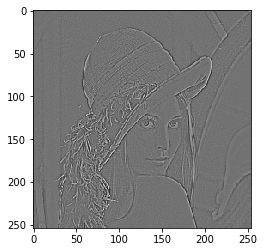

In [7]:
show(out_image)

## Pooling

In [8]:
def pool_kernel():
    k_size = [1,2,2,1]
    x_stride = [1,2,2,1]
    x_padding = 'VALID'
    
    return k_size, x_stride, x_padding



In [9]:
graph, session = graph_session()

x = image_tensor(filename)

k_size, stride, padding = pool_kernel()

pooled = tf.nn.max_pool(value = x, ksize = k_size, strides = stride, padding = padding)

pooled_image = session.run([pooled])

session.close()

image shape : (1, 256, 256, 1)


(1, 1, 128, 128, 1)


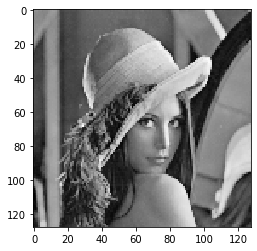

In [13]:
print(np.array(pooled_image).shape)
show(pooled_image)

## Minimise y = x^2

In [128]:
def functionn(i):
    return i**4 + i**6 + i**8 + i + i**2

In [129]:
graph,session = graph_session()

tf_x = tf.Variable(tf.constant(100.0,dtype = tf.float32), name = 'x')
tf_x

<tf.Variable 'x:0' shape=() dtype=float32_ref>

In [130]:
tf_y = functionn(tf_x)
tf_y

<tf.Tensor 'add_3:0' shape=() dtype=float32>

In [131]:
minimise_op = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(tf_y)

In [132]:
tf.global_variables_initializer().run()

In [133]:
history_x = []

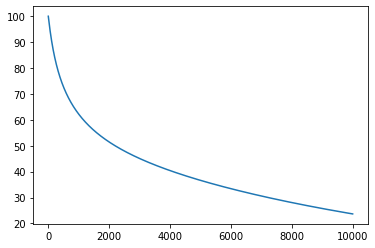

In [134]:


for i in range(10000):
    x,y,_ = session.run([tf_x,tf_y, minimise_op])
    history_x.append(x)

plt.plot(history_x)

In [135]:
session.close()

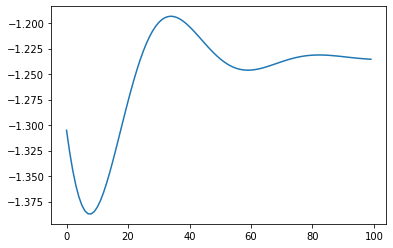

In [85]:
plt.plot(history_x)

In [47]:
print(x,y)

2.8544959e-05 1.2731479e-09


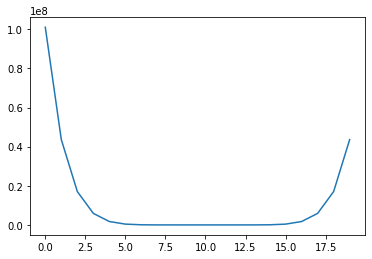

In [102]:
a = []

for i in range(-10,10):
    a.append(functionn(i))
    
plt.plot(a)